In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Calories_to_maintain_weight_Dataset.csv")
data.head()

,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
1,2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
2,4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
3,6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
4,8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0


In [10]:
# Check for missing values in the dataset
missing_data = data.isnull().sum().reset_index()
missing_data.columns = ['Feature', 'Missing Values']

# Display missing data as a table
print(missing_data)

                       Feature  Missing Values
0                          age               0
1                   weight(kg)               0
2                    height(m)               0
3                          BMI               0
4                          BMR               0
5               activity_level               0
6  calories_to_maintain_weight               0
7                     BMI_tags               0
8                        Label               0
9               gender_encoded               0


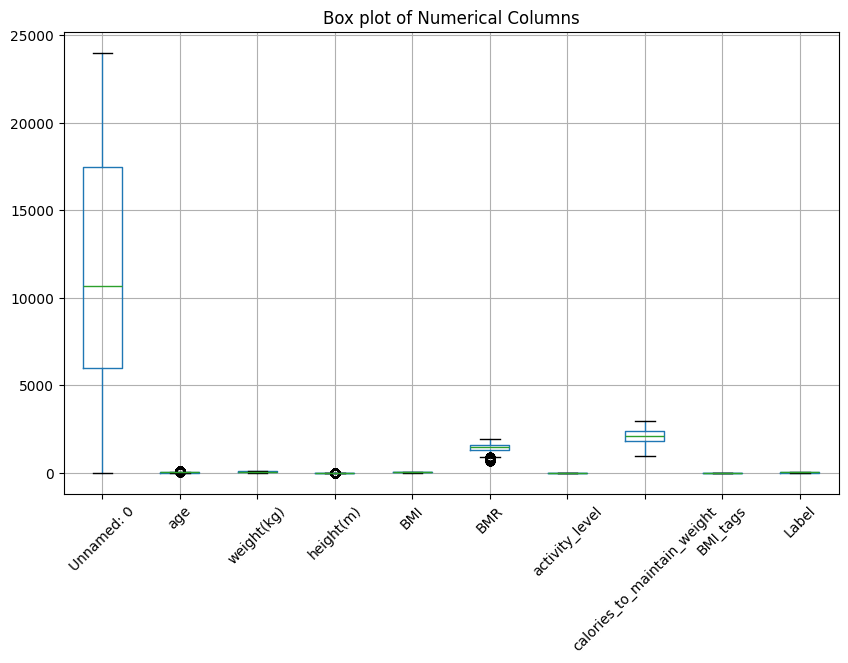

In [3]:
# Select numerical columns from the DataFrame
numerical_columns = data.select_dtypes(include=['int', 'float']).columns

# Create box plots for each numerical column to visualize outliers
plt.figure(figsize=(10, 6))
data[numerical_columns].boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Box plot of Numerical Columns')
plt.show()


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
data['gender_encoded']=le.fit_transform(data['gender'])

In [6]:
data.drop(columns=['gender'], inplace=True)
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
data.head()

,age,weight(kg),height(m),BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label,gender_encoded
0,2,16.097862,0.932025,18.531612,958.584,1.2,1150.3008,8,13,0
1,4,14.619374,0.916687,17.397496,932.383,1.7,1585.0511,7,1,0
2,4,17.899918,0.997288,17.997414,977.578,1.9,1857.3982,7,4,0
3,3,13.532880,1.022786,12.936609,944.689,1.9,1794.9091,7,3,0
4,4,17.039484,1.053977,15.338909,799.229,1.9,1518.5351,7,0,1


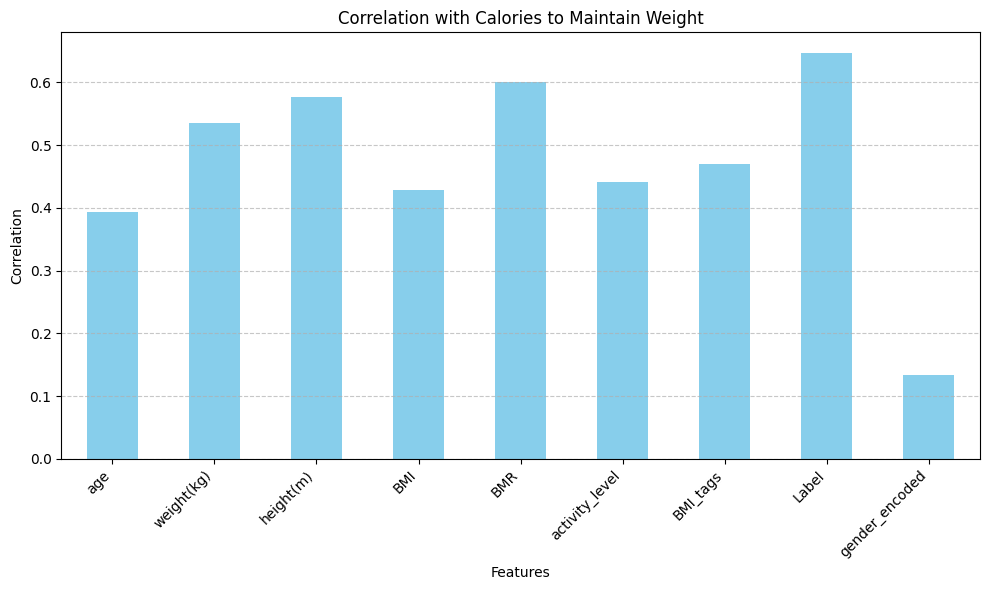

In [8]:
df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()

# Select correlations for 'calories_to_maintain_weight' from the correlation matrix
calories_corr = corr_matrix['calories_to_maintain_weight'].drop('calories_to_maintain_weight')  # Exclude self-correlation

# Plot correlations
plt.figure(figsize=(10, 6))
calories_corr.plot(kind='bar', color='skyblue')
plt.title('Correlation with Calories to Maintain Weight')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
# Print correlations for 'calories_to_maintain_weight'
calories_corr = corr_matrix['calories_to_maintain_weight']
print("Correlations with 'calories_to_maintain_weight':")
print(calories_corr)


Correlations with 'calories_to_maintain_weight':
age                            0.394097
weight(kg)                     0.534520
height(m)                      0.577383
BMI                            0.429220
BMR                            0.600729
activity_level                 0.441669
calories_to_maintain_weight    1.000000
BMI_tags                       0.470396
Label                          0.647399
gender_encoded                 0.133578
Name: calories_to_maintain_weight, dtype: float64
